In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("/content/car data.csv")

In [10]:
df['Car_Age'] = 2025 - df['Year']
df.drop(columns=['Car_Name', 'Year'], inplace=True)

encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out())

df = pd.concat([df.drop(columns=categorical_cols), categorical_df], axis=1)

In [11]:
# Splitting data
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 0.6166737704918033
Mean Squared Error: 0.8729097916393433
Root Mean Squared Error: 0.9342964152983481
R2 Score: 0.9621060281378809


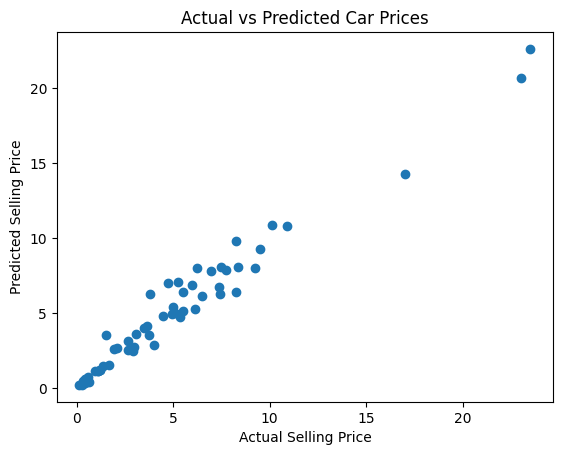

In [13]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()